In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [7]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
39667,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-21,698,12,203,483,Africa
39668,NaN,Yemen,15.552727,48.516388,2020-06-21,941,256,347,338,Eastern Mediterranean
39669,NaN,Comoros,-11.645500,43.333300,2020-06-21,247,5,159,83,Africa
39670,NaN,Tajikistan,38.861034,71.276093,2020-06-21,5457,52,3995,1410,Europe


In [8]:
df['Active'] = df['Confirmed']-df['Deaths']-df['Recovered']

In [9]:
top = df[df['Date']==df['Date'].max()]
world = top.groupby('Country/Region')['Confirmed','Active','Deaths'].sum().reset_index()
world.head()

,Country/Region,Confirmed,Active,Deaths
0,Afghanistan,28833,19488,581
1,Albania,1962,784,44
2,Algeria,11771,2504,845
3,Andorra,855,11,52
4,Angola,183,97,9


In [10]:
figure =px.choropleth(world,locations='Country/Region',
                     locationmode='country names',color = 'Active',
                     hover_name='Country/Region',range_color=[1,1000],
                     color_continuous_scale='Peach',
                     title = "Countries with Active cases")
figure.show()

[Text(0, 0.5, 'Cases'), Text(0.5, 0, 'Dates')]

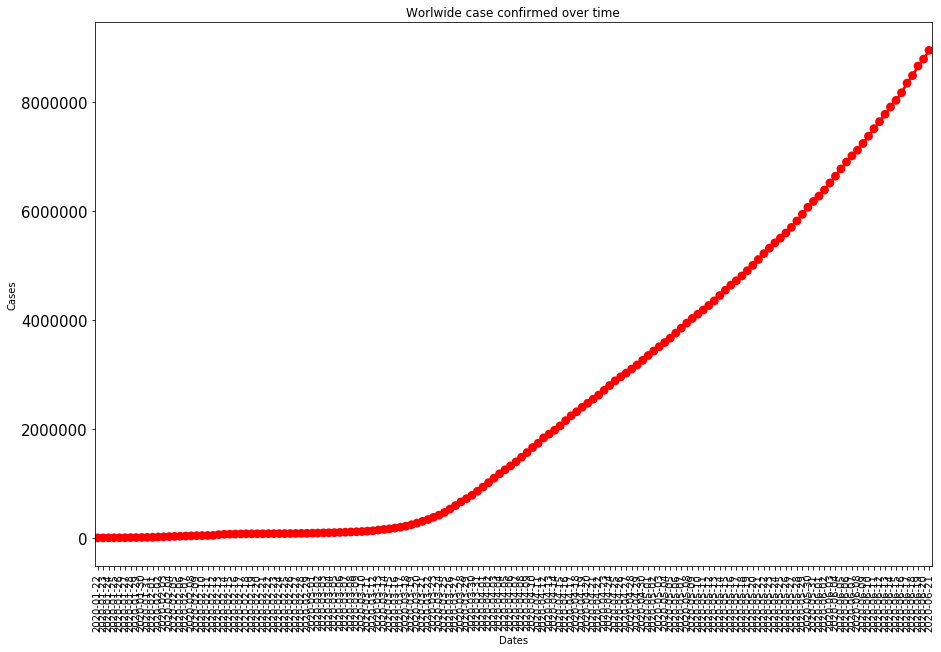

In [11]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90, fontsize =10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize = 10)
plt.ylabel('Total Cases',fontsize = 10)
plt.title('Worlwide case confirmed over time')
total_cases = df.groupby('Date')['Date','Confirmed'].sum().reset_index()
total_cases['Date']= pd.to_datetime(total_cases['Date'])

ax = sns.pointplot(x=total_cases['Date'].dt.date,y= total_cases['Confirmed'],color = 'r')
ax.set(xlabel='Dates',ylabel = 'Cases')

In [12]:
top_activities = top.groupby(by='Country/Region')['Active'].sum().sort_values(ascending =False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

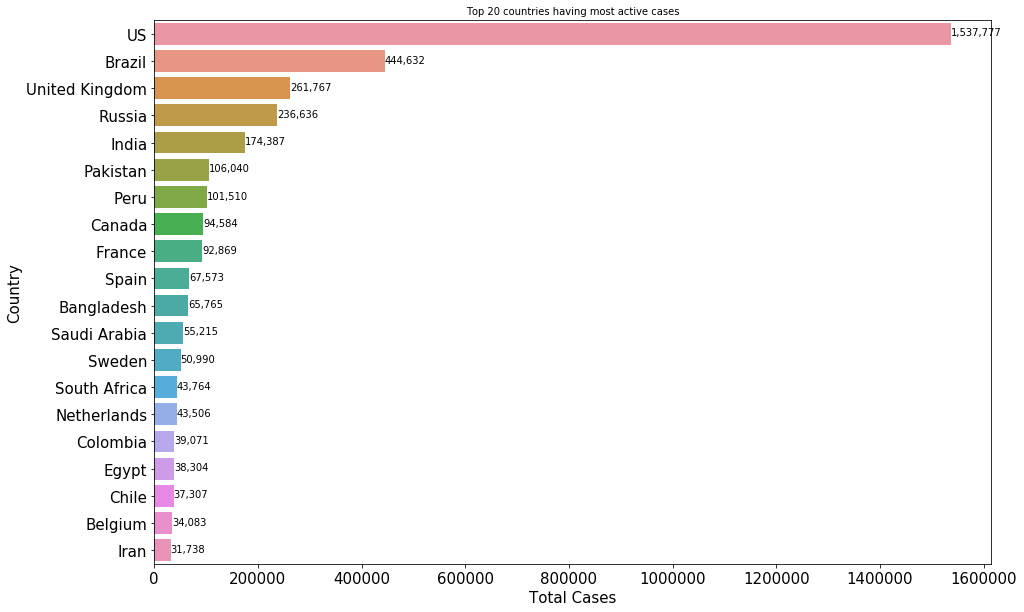

In [13]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.xlabel('Total Cases' ,fontsize = 15)
plt.ylabel('Country Wise' ,fontsize = 15)
plt.title('Top 20 countries having most active cases' ,fontsize=10)

ax = sns.barplot(x=top_activities['Active'], y = top_activities['Country/Region'])
for i ,(value,name) in enumerate (zip(top_activities['Active'],top_activities['Country/Region'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Total Cases',ylabel='Country')

In [14]:
top_deaths = top.groupby(by='Country/Region')['Deaths'].sum().sort_values(ascending =False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

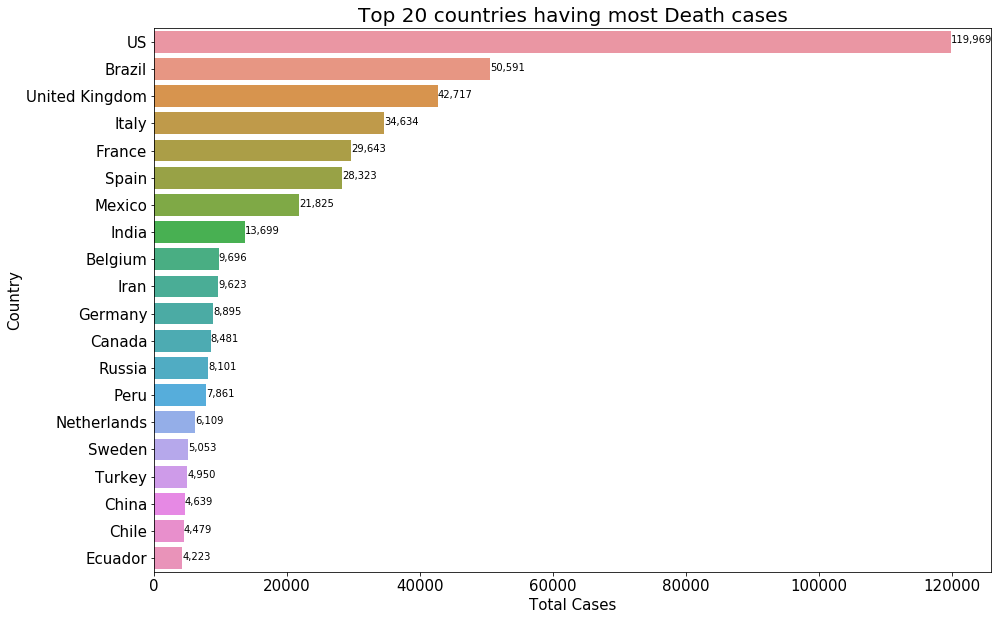

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.xlabel('Total Cases' ,fontsize = 15)
plt.ylabel('Country Wise' ,fontsize = 15)
plt.title('Top 20 countries having most Death cases' ,fontsize=20)

ax = sns.barplot(x=top_deaths['Deaths'], y = top_deaths['Country/Region'])
for i ,(value,name) in enumerate (zip(top_deaths['Deaths'],top_deaths['Country/Region'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Total Cases',ylabel='Country')

In [16]:
top_recovered = top.groupby(by='Country/Region')['Recovered'].sum().sort_values(ascending =False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Recovered Cases')]

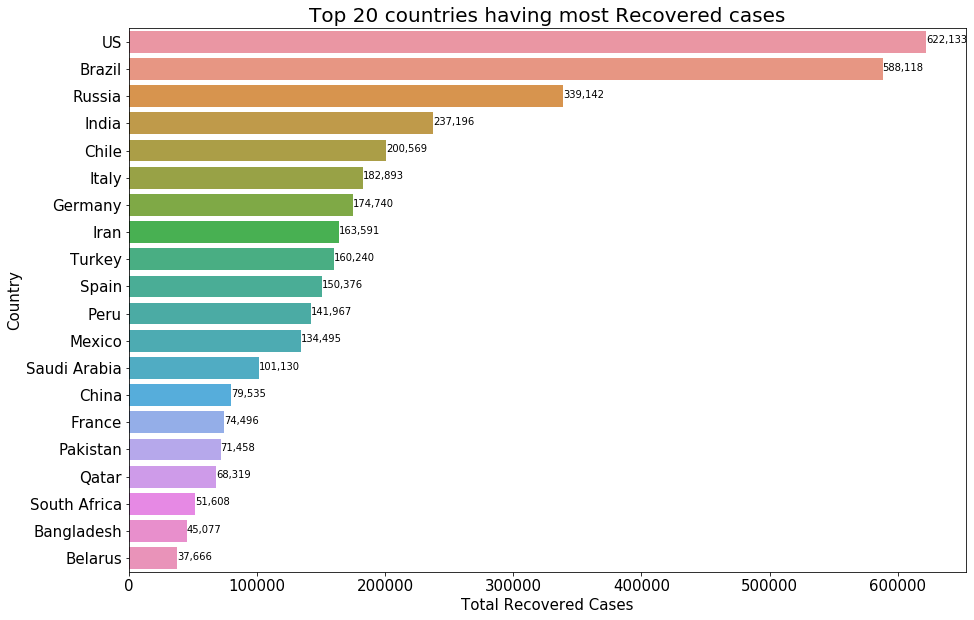

In [17]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.xlabel('Total Recovered Cases' ,fontsize = 15)
plt.ylabel('Country Wise' ,fontsize = 15)
plt.title('Top 20 countries having most Recovered cases' ,fontsize=20)

ax = sns.barplot(x=top_recovered['Recovered'], y = top_recovered['Country/Region'])
for i ,(value,name) in enumerate (zip(top_recovered['Recovered'],top_recovered['Country/Region'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 10,ha='left',va='center')
ax.set(xlabel='Total Recovered Cases',ylabel='Country')

In [18]:
china = df[df['Country/Region']== 'China']
china =china.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()


In [19]:
US = df[df['Country/Region']== 'US']
US =US.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()
US = US.iloc[33:].reset_index().drop('index',axis =1)

In [20]:
Italy = df[df['Country/Region']== 'Italy']
Italy = Italy.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()
Italy = Italy.iloc[9:].reset_index().drop('index',axis =1)

In [21]:
India = df[df['Country/Region']== 'India']
India = India.groupby(by='Date')['Recovered','Deaths','Active','Confirmed'].sum().reset_index()
India = India.iloc[9:].reset_index().drop('index',axis =1)

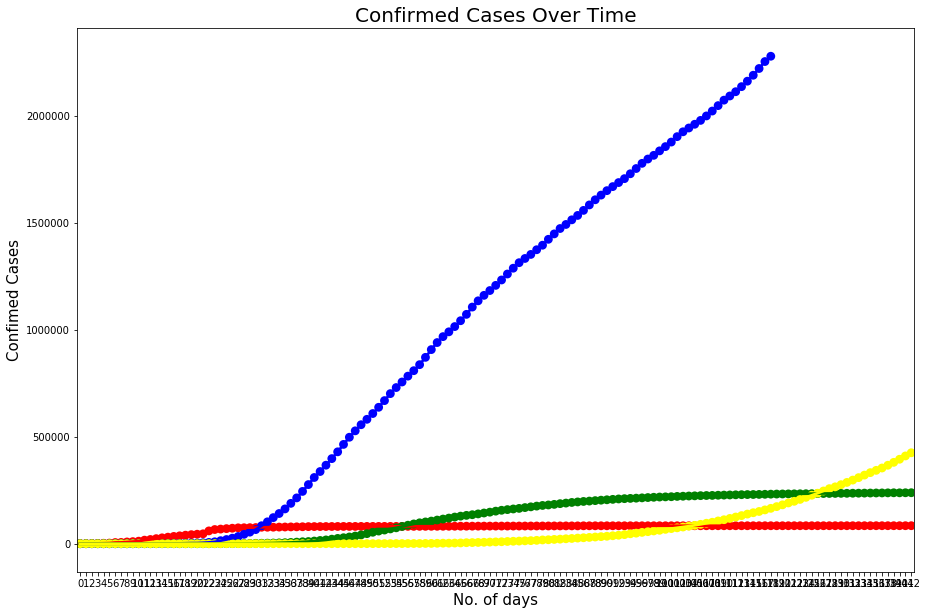

In [22]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Confirmed,color = 'Red')
sns.pointplot(US.index,US.Confirmed,color = 'Blue')
sns.pointplot(Italy.index,Italy.Confirmed,color = 'Green')
sns.pointplot(India.index,India.Confirmed,color = 'Yellow')

plt.title('Confirmed Cases Over Time',fontsize = 20)
plt.ylabel('Confimed Cases',fontsize = 15)
plt.xlabel('No. of days', fontsize =15)
plt.show()

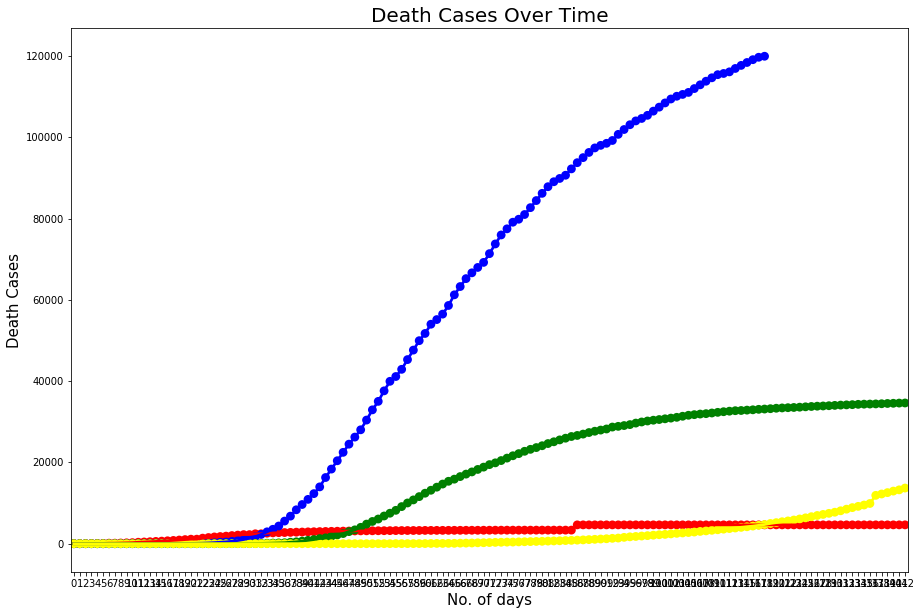

In [23]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Deaths,color = 'Red')
sns.pointplot(US.index,US.Deaths,color = 'Blue')
sns.pointplot(Italy.index,Italy.Deaths,color = 'Green')
sns.pointplot(India.index,India.Deaths,color = 'Yellow')

plt.title('Death Cases Over Time',fontsize = 20)
plt.ylabel('Death Cases',fontsize = 15)
plt.xlabel('No. of days', fontsize =15)
plt.show()

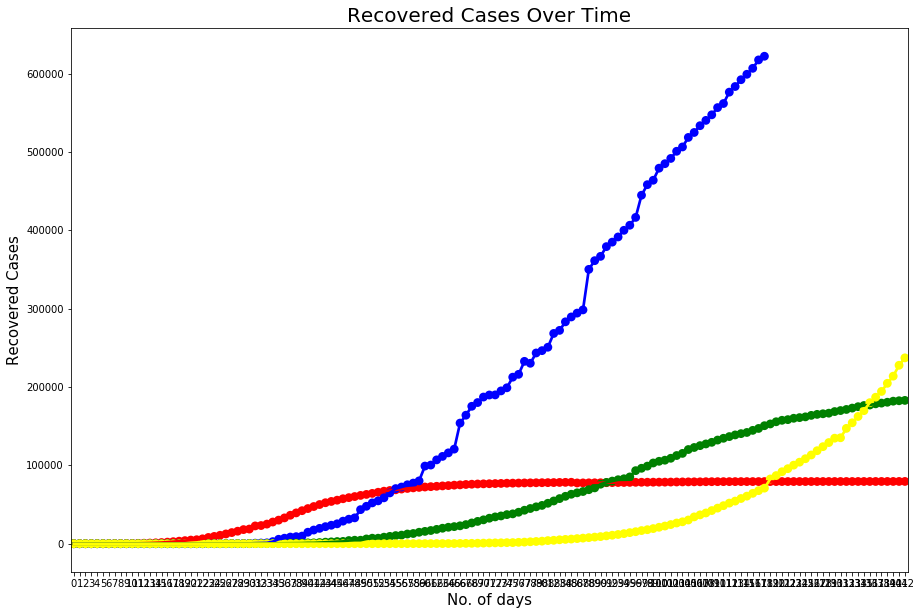

In [24]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.Recovered,color = 'Red')
sns.pointplot(US.index,US.Recovered,color = 'Blue')
sns.pointplot(Italy.index,Italy.Recovered,color = 'Green')
sns.pointplot(India.index,India.Recovered,color = 'Yellow')

plt.title('Recovered Cases Over Time',fontsize = 20)
plt.ylabel('Recovered Cases',fontsize = 15)
plt.xlabel('No. of days', fontsize =15)
plt.show()